# Gallstone_Detection_Classification_Webinar

# Import Libraries

In [213]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Data 


In [214]:
df = pd.read_csv("/kaggle/input/gallstone-dataset-uci/gallstone_.csv")
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


# Data Analysis 

In [215]:
df.shape

(319, 39)

In [216]:
df.dtypes

Gallstone Status                                    int64
Age                                                 int64
Gender                                              int64
Comorbidity                                         int64
Coronary Artery Disease (CAD)                       int64
Hypothyroidism                                      int64
Hyperlipidemia                                      int64
Diabetes Mellitus (DM)                              int64
Height                                              int64
Weight                                            float64
Body Mass Index (BMI)                             float64
Total Body Water (TBW)                            float64
Extracellular Water (ECW)                         float64
Intracellular Water (ICW)                         float64
Extracellular Fluid/Total Body Water (ECF/TBW)    float64
Total Body Fat Ratio (TBFR) (%)                   float64
Lean Mass (LM) (%)                                float64
Body Protein C

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [218]:
df.describe()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.00000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,0.495298,48.068966,0.492163,0.335423,0.037618,0.028213,0.025078,0.134796,167.15674,80.564890,...,49.475549,144.502163,21.684953,26.855799,73.112539,0.800611,100.818903,1.853856,14.418182,21.401411
std,0.500763,12.114558,0.500724,0.517340,0.190568,0.165841,0.156609,0.342042,10.05303,15.709069,...,17.718701,97.904493,16.697605,27.884413,24.181069,0.176433,16.971396,4.989591,1.775815,9.981659
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.00000,42.900000,...,25.000000,1.390000,8.000000,3.000000,7.000000,0.460000,10.600000,0.000000,8.500000,3.500000
25%,0.000000,38.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.50000,69.600000,...,40.000000,83.000000,15.000000,14.250000,58.000000,0.650000,94.170000,0.000000,13.300000,13.250000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.00000,78.800000,...,46.500000,119.000000,18.000000,19.000000,71.000000,0.790000,104.000000,0.215000,14.400000,22.000000
75%,1.000000,56.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,175.00000,91.250000,...,56.000000,172.000000,23.000000,30.000000,86.000000,0.920000,110.745000,1.615000,15.700000,28.060000
max,1.000000,96.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,191.00000,143.500000,...,273.000000,838.000000,195.000000,372.000000,197.000000,1.460000,132.000000,43.400000,18.800000,53.100000


In [219]:
df.isnull().sum()

Gallstone Status                                  0
Age                                               0
Gender                                            0
Comorbidity                                       0
Coronary Artery Disease (CAD)                     0
Hypothyroidism                                    0
Hyperlipidemia                                    0
Diabetes Mellitus (DM)                            0
Height                                            0
Weight                                            0
Body Mass Index (BMI)                             0
Total Body Water (TBW)                            0
Extracellular Water (ECW)                         0
Intracellular Water (ICW)                         0
Extracellular Fluid/Total Body Water (ECF/TBW)    0
Total Body Fat Ratio (TBFR) (%)                   0
Lean Mass (LM) (%)                                0
Body Protein Content (Protein) (%)                0
Visceral Fat Rating (VFR)                         0
Bone Mass (B

In [220]:
df.columns

Index(['Gallstone Status', 'Age', 'Gender', 'Comorbidity',
       'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia',
       'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)',
       'Total Body Water (TBW)', 'Extracellular Water (ECW)',
       'Intracellular Water (ICW)',
       'Extracellular Fluid/Total Body Water (ECF/TBW)',
       'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)',
       'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)',
       'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)',
       'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)',
       'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)',
       'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)',
       'High Density Lipoprotein (HDL)', 'Triglyceride',
       'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)',
       'Alkaline Phosphatase (ALP)', 'Creatinine',
       'Glomerular Filtration Rate (GFR

# Data Preprocessing and Splitting

In [221]:
df.rename(columns={"Gallstone Status": "Gallstone_status"}, inplace=True)

In [222]:
X = df.drop("Gallstone_status",axis=1)
y = df["Gallstone_status"]

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [224]:
sc = StandardScaler()

In [225]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Model Implementation 

In [226]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [227]:
y_pred = model.predict(X_test_scaled)

Accuracy: 84.38%

Classification Report:
               precision    recall  f1-score   support

No Gallstones       0.83      0.88      0.85        33
   Gallstones       0.86      0.81      0.83        31

     accuracy                           0.84        64
    macro avg       0.85      0.84      0.84        64
 weighted avg       0.84      0.84      0.84        64



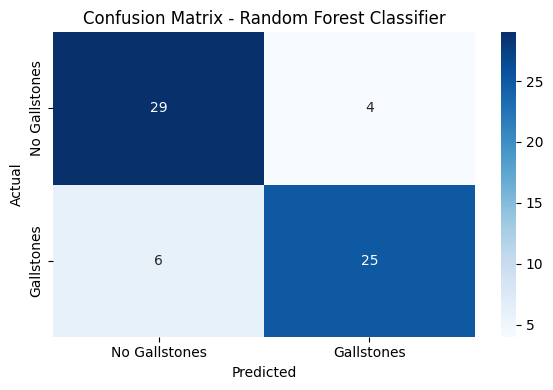

In [228]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels manually or extract from original column if needed
class_names = ['No Gallstones', 'Gallstones']  # Modify if needed

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()
